# Building Communities

In [17]:
import networkx as nx
import random

#
# when seed is None, the graph is randomly generated and colored.
#
def randomly_colored_graph(n, pair_prob=0.5, color_prob=0.25, seed=2022):
    random.seed(seed)
    G = nx.Graph()
    for i in range(n):
        if random.random() < color_prob:
            G.add_node(i, color='red')
        else:
            G.add_node(i, color='white')
    for i in range(n):
        for j in range(i+1,n):
            if random.random() < pair_prob:
                G.add_edge(i,j)
    return G


def draw_colored_graph(G):
    nx.draw_networkx(
        G, 
        with_labels=True, 
        node_color=[ G.nodes[i]['color'] for i in G.nodes ],
    )

We'll add an "is_valid" parameter which checks to see if a solution is a valid solution.


In [18]:

def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]]
     
def generate(solution, i, possibilities, is_valid, g):
    if i==len(solution):
        if is_valid(solution, g):
            print(get_nodes(solution))
    else:
        for possibility in possibilities(solution, i, g):
            solution[i] = possibility
            generate(solution, i+1, possibilities, is_valid, g)
       

### Building communities

+ Connect two people with a common interest and a common friend.
+ Connect people who are connected to a common, popular friend.

#### Connect two people with a common interest and a common friend.


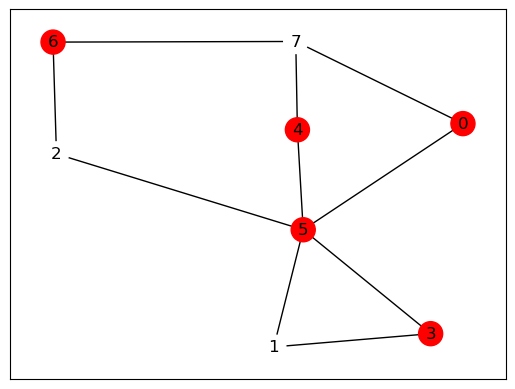

In [3]:
G = randomly_colored_graph(8, pair_prob=0.3, color_prob=0.5, seed=12)
draw_colored_graph(G)

In [58]:

def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]]
     
def generate(solution, i, possibilities, is_valid, g):
    if i==len(solution):
        if is_valid(solution, g):
            print(get_nodes(solution))
        # else:
        #     print('\t', get_nodes(solution), 'is invalid.')
    else:
        for possibility in possibilities(solution, i, g):
            solution[i] = possibility
            generate(solution, i+1, possibilities, is_valid, g)
       

To use this template, we must provide is_valid and possibilities.

In [59]:
#
# Input: solution - a list of n boolean values.
#        solution[i] is True if node i is in the set of selected nodes.
# Output: True if solution has all of these requirements:
#   1. Exactly two nodes.
#   2. Are not connected
#   3. Are both "red"
#   4. Have a common friend
#
def two_people_with_common_interest(solution, g):
    selected_nodes = get_nodes(solution)
    if len(selected_nodes)!=2:
        return False
    u, v = selected_nodes
    if (u,v) in g.edges:
        return False
    if g.nodes[u]['color']!='red' or g.nodes[v]['color']!='red':
        return False
    friends_of_u = set(g.neighbors(u))
    friends_of_v = set(g.neighbors(v))
    if len(friends_of_u.intersection(friends_of_v)) == 0:
        return False
    return True

def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]==True]

def possibilities(solution, i, g):
    # if there are more than 2 nodes, stop exploration, i.e. no possibilities, ie. return []
    selected_nodes = get_nodes(solution)
    if len(selected_nodes)>2:
        return []
    return [True, False]

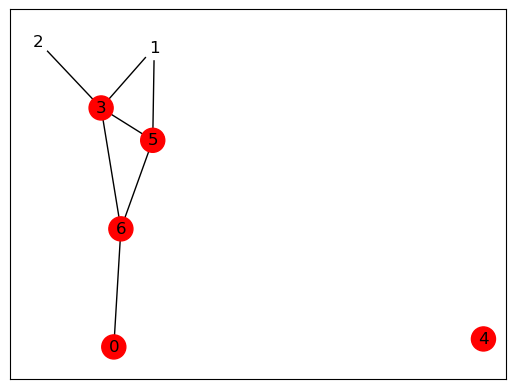

In [68]:
G = randomly_colored_graph(7, pair_prob=0.3, color_prob=0.5, seed=12)
draw_colored_graph(G)

In [69]:
generate([None]*len(G), 0, possibilities, two_people_with_common_interest, G)

[0, 3]
[0, 5]


#### Connect people who are connected to a common, popular friend.

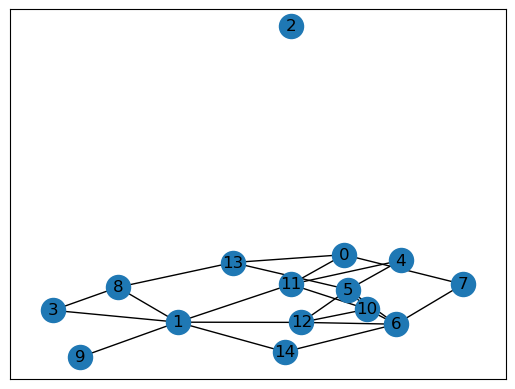

In [72]:
G = nx.gnp_random_graph(n=15, p=0.2, seed=11)
nx.draw_networkx(G, with_labels=True)

In [73]:
def create_subgraphs(g, nodes):
    N = nodes.copy()
    for n in nodes:
        N.extend(list(G.neighbors(n)))
    print(N)
    return G.subgraph(N)

[6, 13, 5, 7, 10, 12, 14, 0, 5, 8]


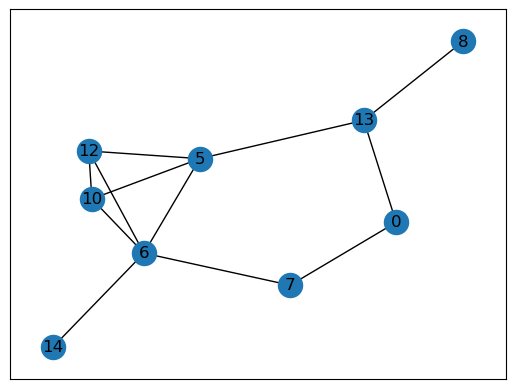

In [74]:
nx.draw_networkx(create_subgraphs(G, [6,13]), with_labels=True)